# Telecom Churn Case study

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
# reading dataset into a dataframe using pandas
churn = pd.read_csv("telecom_churn_data.csv")

In [4]:
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
# feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

There are 226 columns in total and most of them are numerical variables.

In [6]:
# statistics of the numerical columns
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

In [8]:
# Date columns
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

In [9]:
#Categorical columns
cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

In [10]:
# create copy of data
original = churn.copy()

# Data Preprocessing

## 1. Dropping ID and Date columns

In [11]:
# drop id and date columns
churn.drop(id_cols + date_cols, axis=1, inplace=True)

In [12]:
churn.shape

(99999, 212)

## 2. Dropping columns with only 1 unique value as it doesn't add anything to the model

In [13]:
drop_cols = [c for c
             in list(churn)
             if churn[c].nunique() <= 1]

In [14]:
drop_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [15]:
churn.drop(drop_cols, axis=1, inplace=True)

In [16]:
churn.shape

(99999, 201)

# Handling missing values

In [17]:
# Missing values percentage in each column
nulls=(churn.isnull().sum()*100/churn.shape[0])
nulls.sort_values(ascending=False)

total_rech_data_6    74.846748
arpu_3g_6            74.846748
arpu_2g_6            74.846748
fb_user_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_9        0.000000
max_rech_amt_8        0.000000
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
sep_vbc_3g            0.000000
Length: 201, dtype: float64

Before moving onto removing the null values, it is better to understand what these null values represent. Let's see the recharge columns

## 1. Recharge Columns 

In [18]:
# list of columns related to recharge data
recharge = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

churn[recharge].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


##### If there are null values then it's probably because a recharge has not been done. We can impute these null values to 0

In [19]:
# impute missing values with 0 as described above

temp_zero = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]
churn[temp_zero] = churn[temp_zero].apply(lambda x: x.fillna(0))

In [20]:
#Checking null values columns again
nulls = (churn.isnull().sum()* 100/len(churn)).to_frame()
nulls.sort_values(by=0,ascending=False)

,0
arpu_3g_6,74.846748
count_rech_2g_6,74.846748
fb_user_6,74.846748
count_rech_3g_6,74.846748
arpu_2g_6,74.846748
...,...
last_day_rch_amt_8,0.000000
last_day_rch_amt_7,0.000000
last_day_rch_amt_6,0.000000
max_rech_amt_9,0.000000


## 2. 2G|3G related columns

In [21]:
usage_2g_and_3g = list(churn.columns[churn.columns.str.contains('2g|3g',regex=True)])

In [22]:
usage_2g_and_3g

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_2g_mb_9',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'vol_3g_mb_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g']

In [23]:
nulls = (churn[usage_2g_and_3g].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0
count_rech_2g_6,74.846748
count_rech_2g_7,74.428744
count_rech_2g_8,73.660737
count_rech_2g_9,74.077741
count_rech_3g_6,74.846748
count_rech_3g_7,74.428744
count_rech_3g_8,73.660737
count_rech_3g_9,74.077741
arpu_3g_6,74.846748
arpu_3g_7,74.428744


All the above columns have more than 70% null values. It is better to drop these columns altogether

In [24]:
nulls_abv_thresh = nulls[nulls[0]>0]
nulls_abv_thresh.index

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [25]:
cols_to_be_dropped = list(nulls_abv_thresh.index)
churn.drop(cols_to_be_dropped, axis=1, inplace=True)

In [26]:
nulls = (churn.isnull().sum()* 100/len(churn)).to_frame()
nulls.sort_values(by=0,ascending=False)

,0
night_pck_user_6,74.846748
fb_user_6,74.846748
night_pck_user_7,74.428744
fb_user_7,74.428744
night_pck_user_9,74.077741
...,...
last_day_rch_amt_6,0.000000
max_rech_amt_9,0.000000
max_rech_amt_8,0.000000
max_rech_amt_7,0.000000


## 3. Volume based cost(vbc) columns

In [27]:
vbc_cols = list(churn.columns[churn.columns.str.contains('vbc',regex=True)])

In [28]:
vbc_cols

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [29]:
nulls = (churn[vbc_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0


## 4. Service scheme validity less than month(sachet) columns

In [30]:
sachet_cols = list(churn.columns[churn.columns.str.contains('sachet',regex=True)])

In [31]:
sachet_cols

['sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9']

In [32]:
nulls = (churn[sachet_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0


## 5. ARPU columns

In [33]:
arpu_cols = list(churn.columns[churn.columns.str.contains('arpu',regex=True)])

In [34]:
arpu_cols

['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9']

In [35]:
nulls = (churn[arpu_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0


## 6. Minutes of usage - voice calls

In [36]:
mou_cols = list(churn.columns[churn.columns.str.contains('mou',regex=True)])

In [37]:
mou_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [38]:
nulls = (churn[mou_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls.sort_values(by=0,ascending=False)

,0
isd_ic_mou_9,7.745077
loc_ic_mou_9,7.745077
std_og_t2m_mou_9,7.745077
loc_og_mou_9,7.745077
std_og_t2f_mou_9,7.745077
...,...
total_og_mou_6,0.000000
total_og_mou_7,0.000000
total_og_mou_8,0.000000
total_og_mou_9,0.000000


So for all minutes of usage columns the maximum missing % is 7.74 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [39]:
# replaceing null values by 0 for minutes of usage variables
churn.loc[:,mou_cols] = churn.loc[:,mou_cols].replace(np.NaN,0)

In [40]:
nulls = (churn.isnull().sum()* 100/len(churn)).to_frame()
nulls.sort_values(by=0,ascending=False)

,0
night_pck_user_6,74.846748
fb_user_6,74.846748
night_pck_user_7,74.428744
fb_user_7,74.428744
night_pck_user_9,74.077741
...,...
spl_og_mou_8,0.000000
spl_og_mou_9,0.000000
total_og_mou_6,0.000000
total_og_mou_7,0.000000


## 7. Offnet Usage columns

In [41]:
offnet_cols = list(churn.columns[churn.columns.str.contains('offnet',regex=True)])

In [42]:
offnet_cols

['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9']

In [43]:
nulls = (churn[offnet_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0


## 8. Onnet columns

In [44]:
onnet_cols = list(churn.columns[churn.columns.str.contains('onnet',regex=True)])

In [45]:
onnet_cols

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9']

In [46]:
nulls = (churn[onnet_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0


## 9. FB and Night User columns

In [47]:
fb_night_cols = list(churn.columns[churn.columns.str.contains('fb|night',regex=True)])

In [48]:
fb_night_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [49]:
nulls = (churn[fb_night_cols].isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0
night_pck_user_6,74.846748
night_pck_user_7,74.428744
night_pck_user_8,73.660737
night_pck_user_9,74.077741
fb_user_6,74.846748
fb_user_7,74.428744
fb_user_8,73.660737
fb_user_9,74.077741


All the above columns have more than 70% null values. It is better to drop these columns altogether

In [50]:
churn.drop(fb_night_cols, axis=1, inplace=True)

In [51]:
churn.shape

(99999, 177)

## 10. Other columns with nulls 

In [52]:
nulls = (churn.isnull().sum()* 100/len(churn)).to_frame()
nulls[nulls[0]>0]

,0
og_others_6,3.937039
og_others_7,3.859039
og_others_8,5.378054
og_others_9,7.745077
ic_others_6,3.937039
ic_others_7,3.859039
ic_others_8,5.378054
ic_others_9,7.745077


In [53]:
nulls_greater_than_0 = nulls[nulls[0]>0]

In [54]:
others_cols = list(nulls_greater_than_0.index)

In [55]:
others_cols

['og_others_6',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9']

In [56]:
# replaceing null values by 0 for others variables
churn.loc[:,others_cols] = churn.loc[:,others_cols].replace(np.NaN,0)

We can impute them with 0 as the percentage of null values is very low and will not impact the analysis

In [57]:
# Missing values percentage in each column
nulls=(churn.isnull().sum()*100/churn.shape[0])
nulls[nulls>0]

Series([], dtype: float64)

All the null values are handled. 

In [58]:
churn.shape

(99999, 177)

# Filter only the Customers can be considered as high Value customers

In [59]:
# total data recharge amount for June and July = number of recharges * average recharge amount
churn['total_amt_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_amt_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7
churn['total_amt_data_rech_8'] = churn.total_rech_data_8 * churn.av_rech_amt_data_8

In [60]:
# total recharge amount for June and July = call recharge amount + data recharge amount
churn['amt_6'] = churn.total_rech_amt_6 + churn.total_amt_data_rech_6
churn['amt_7'] = churn.total_rech_amt_7 + churn.total_amt_data_rech_7
churn['amt_8'] = churn.total_rech_amt_8+ churn.total_amt_data_rech_8

In [61]:
# calculate average recharge done by customer in June and July(Good phase)
churn['avg_amt_6_7'] = (churn.amt_6 + churn.amt_7)/2

In [62]:
# look at the 70th percentile recharge amount
print("70th percentile of Recharge amount: {0}".format(churn.avg_amt_6_7.quantile(0.7)))

70th percentile of Recharge amount: 478.0


In [63]:
high_value_filter = churn.avg_amt_6_7.quantile(0.7)

In [64]:
# retain only those customers who have recharged their mobiles with more than 70th percentile amount
filtered_churn = churn[churn.avg_amt_6_7 > high_value_filter]

## Dropping columns created for filtering high value customers

In [65]:
cols_to_drop = ["amt_6","amt_7","amt_8","avg_amt_6_7"]
filtered_churn.drop(cols_to_drop,axis=1,inplace=True)

In [66]:
filtered_churn.shape

(29953, 180)

# Derive churn variable

In [67]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [68]:
filtered_churn['churn'] = filtered_churn.apply(lambda row: 1 if (row.total_ic_mou_9 == 0 and row.total_og_mou_9 == 0 and row.vol_2g_mb_9 == 0 and row.vol_3g_mb_9 == 0) else 0, axis=1)

In [69]:
filtered_churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_data_rech_6,total_amt_data_rech_7,total_amt_data_rech_8,churn
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,1
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.0

In [70]:
filtered_churn.churn.value_counts(normalize=True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

# Further cleaning data - Remove data from 9th month (Churn month)

In [71]:
filtered_churn.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [72]:
### 9th month is the churn month, therefore we have to delete the data from the 9th month
churn_month_9_columns =  filtered_churn.columns[filtered_churn.columns.str.contains('_9')]

In [73]:
filtered_churn.drop(churn_month_9_columns,axis=1,inplace=True)

In [74]:
filtered_churn.shape

(29953, 137)

# Derive additional column for analysis

We will take average of 6th and 7th month's data to derive new features but at the same time reduce the total number of features

In [75]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = filtered_churn.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    filtered_churn[avg_col_name] = (filtered_churn[col_6]  + filtered_churn[col_7])/ 2

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt',
       'total_rech_data', 'max_rech_data', 'av_rech_amt_data', 'vol_2g_mb',
       'vol_3g_mb', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g',
       'vbc_3g', 'total_amt_data_rech'],
      dtype='object')

In [76]:
print ("dimension of the updated dataset after creating derived features:",filtered_churn.shape)
col_to_drop = filtered_churn.filter(regex='_6|_7').columns
filtered_churn.drop(col_to_drop, axis=1, inplace=True)

print("dimension of the dataset after dropping un-necessary columns:",filtered_churn.shape)

dimension of the updated dataset after creating derived features: (29953, 182)
dimension of the dataset after dropping un-necessary columns: (29953, 92)


In [77]:
filtered_churn.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8',
       'total_amt_data_rech_8', 'churn', 'avg_arpu_av67', 'avg_onnet_mou_av67',
       'avg_offnet_mou_av67', 'avg_roam_ic_mou_

In [78]:
filtered_churn.churn.value_counts(normalize=True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [79]:
# lets now conevrt AON in months
filtered_churn['aon_mon'] = filtered_churn['aon']/30
filtered_churn.drop('aon', axis=1, inplace=True)
filtered_churn['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

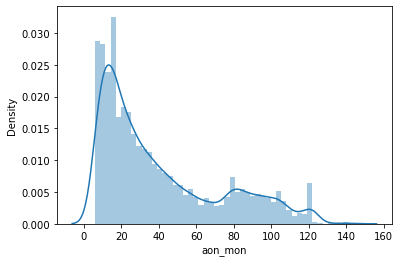

In [80]:
sns.distplot(filtered_churn.aon_mon)
plt.show();

In [81]:
tn_range = [0, 6, 12, 24, 60, 160]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
filtered_churn['tenure_range'] = pd.cut(filtered_churn['aon_mon'], tn_range, labels=tn_label)
filtered_churn['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [82]:
filtered_churn["tenure_range"].isnull().sum()

0

# Exploratory Data Analysis

In [83]:
filtered_churn.churn.value_counts(normalize=True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

In [84]:
filtered_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 93 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   arpu_8                        29953 non-null  float64 
 1   onnet_mou_8                   29953 non-null  float64 
 2   offnet_mou_8                  29953 non-null  float64 
 3   roam_ic_mou_8                 29953 non-null  float64 
 4   roam_og_mou_8                 29953 non-null  float64 
 5   loc_og_t2t_mou_8              29953 non-null  float64 
 6   loc_og_t2m_mou_8              29953 non-null  float64 
 7   loc_og_t2f_mou_8              29953 non-null  float64 
 8   loc_og_t2c_mou_8              29953 non-null  float64 
 9   loc_og_mou_8                  29953 non-null  float64 
 10  std_og_t2t_mou_8              29953 non-null  float64 
 11  std_og_t2m_mou_8              29953 non-null  float64 
 12  std_og_t2f_mou_8              29953 non-null  

In [85]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = filtered_churn
    plt.subplot(2,2,1)
    sns.boxplot(data=df, y="avg_" +attribute+"_av67",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,2,2)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [86]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [87]:
num_cols = list(filtered_churn.columns)

In [88]:
cat_cols = ["tenure_range"]

In [89]:
# Define plot functions that can be used throughout the excercise

def univariate(var, stats=True):
    if data_type(var) == 'numerical':
        sns.distplot(var)
        if stats == True:
            print(var.describe())
    
    elif data_type(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
            
    else:
        print("Invalid var passed")
        
def data_type(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'
    
       
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)


## Univariate EDA

count    29953.000000
mean         1.623009
std          2.997534
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         60.000000
Name: total_rech_data_8, dtype: float64


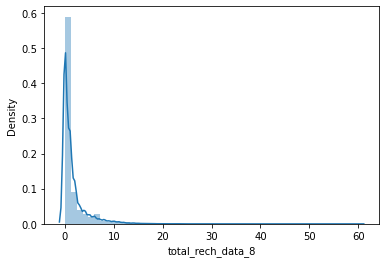

In [90]:
univariate(filtered_churn.total_rech_data_8)

count    29953.000000
mean         1.762762
std          2.708014
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         54.500000
Name: avg_total_rech_data_av67, dtype: float64


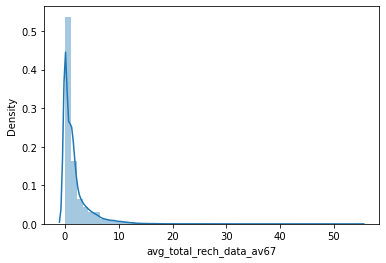

In [91]:
univariate(filtered_churn.avg_total_rech_data_av67)

> The recharge amounts are left skewed, meaning that majority of the people recharge in the lower amount

count    29953.000000
mean       105.873758
std        313.058933
min          0.000000
25%          0.000000
50%          0.000000
75%         51.690000
max      11117.610000
Name: vol_2g_mb_8, dtype: float64


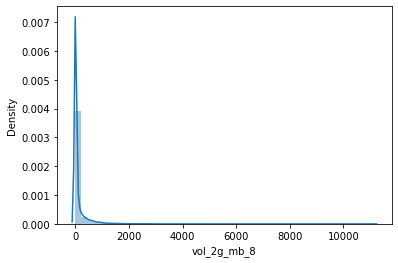

In [92]:
univariate(filtered_churn.vol_2g_mb_8)

count    29953.000000
mean       125.818200
std        299.869268
min          0.000000
25%          0.000000
50%          6.285000
75%        108.105000
max       7939.075000
Name: avg_vol_2g_mb_av67, dtype: float64


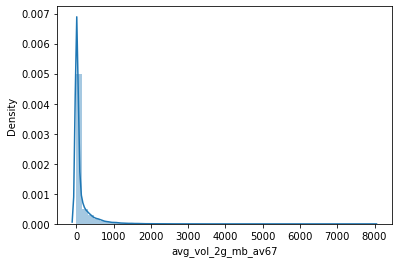

In [93]:
univariate(filtered_churn.avg_vol_2g_mb_av67)

> The Mobile internet usage volume (3g) is also left skewed

count    29953.000000
mean       508.890301
std        502.136278
min       -945.808000
25%        231.615000
50%        427.604000
75%        661.753000
max      33543.624000
Name: arpu_8, dtype: float64


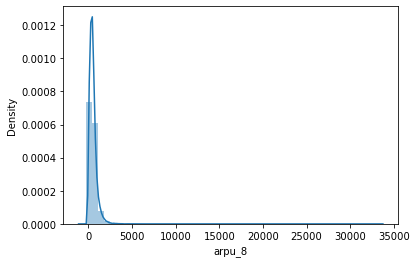

In [94]:
univariate(filtered_churn.arpu_8)

count    29953.000000
mean       559.990303
std        430.142954
min       -749.783000
25%        345.498000
50%        485.312500
75%        674.950500
max      31438.461000
Name: avg_arpu_av67, dtype: float64


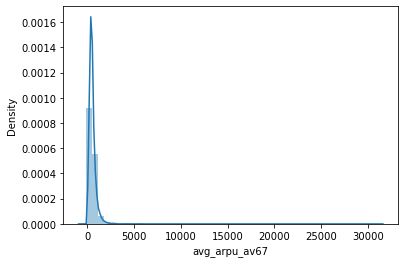

In [95]:
univariate(filtered_churn.avg_arpu_av67)

> The Average revenue per user is also left skewed

## Bivariate EDA

### Recharge columns

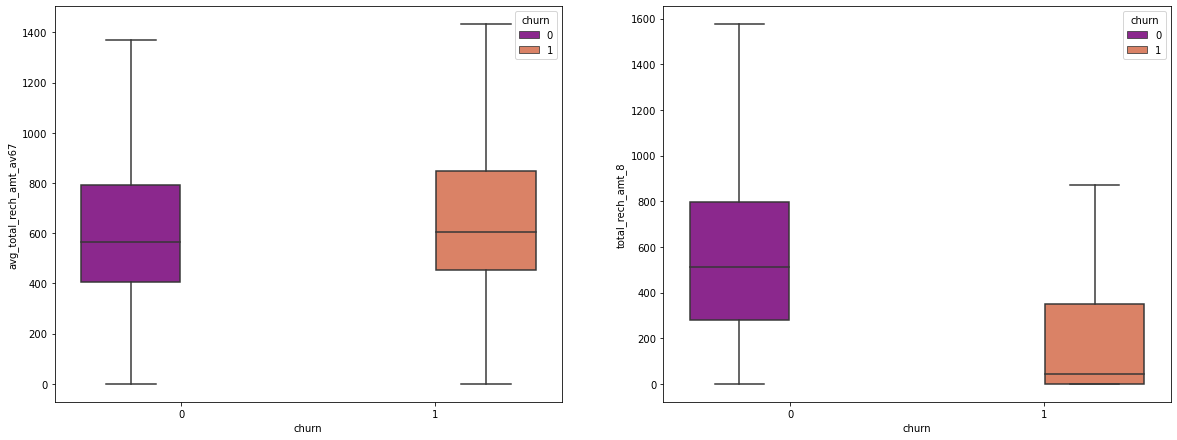

In [96]:
plot_box_chart("total_rech_amt")

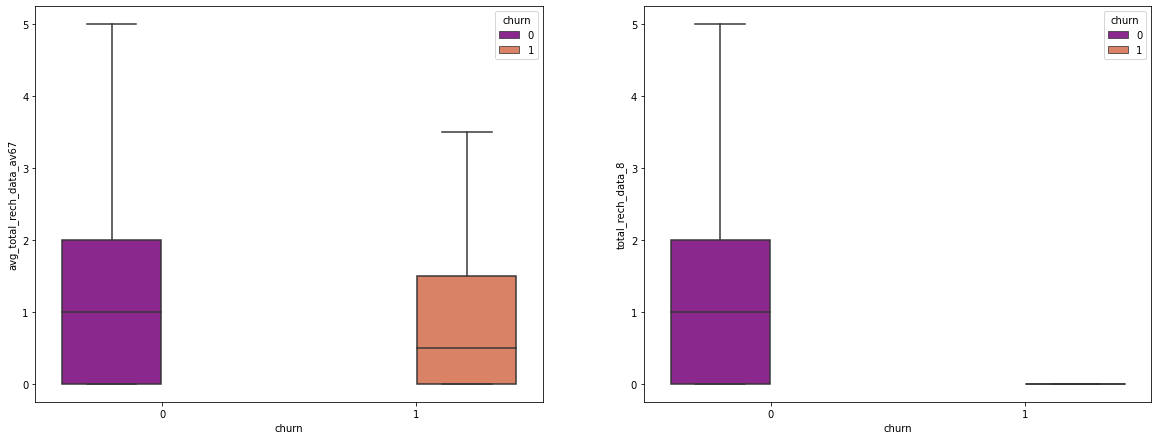

In [97]:
plot_box_chart('total_rech_data')

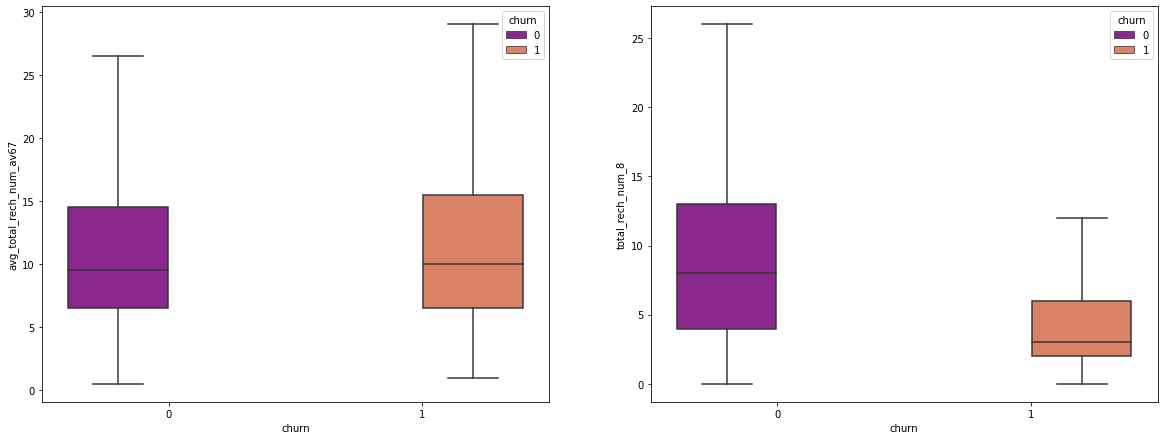

In [98]:
plot_box_chart('total_rech_num')

### Volume usage columns

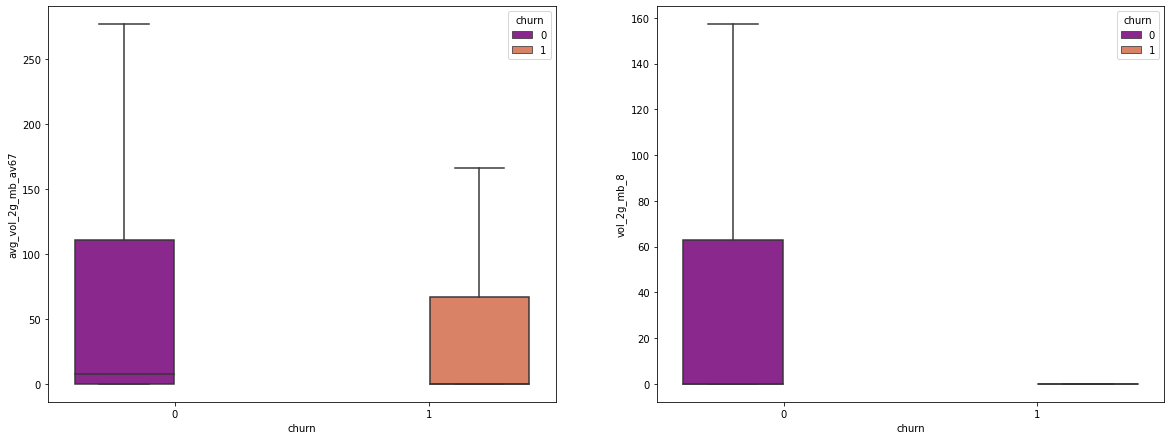

In [99]:
plot_box_chart('vol_2g_mb')

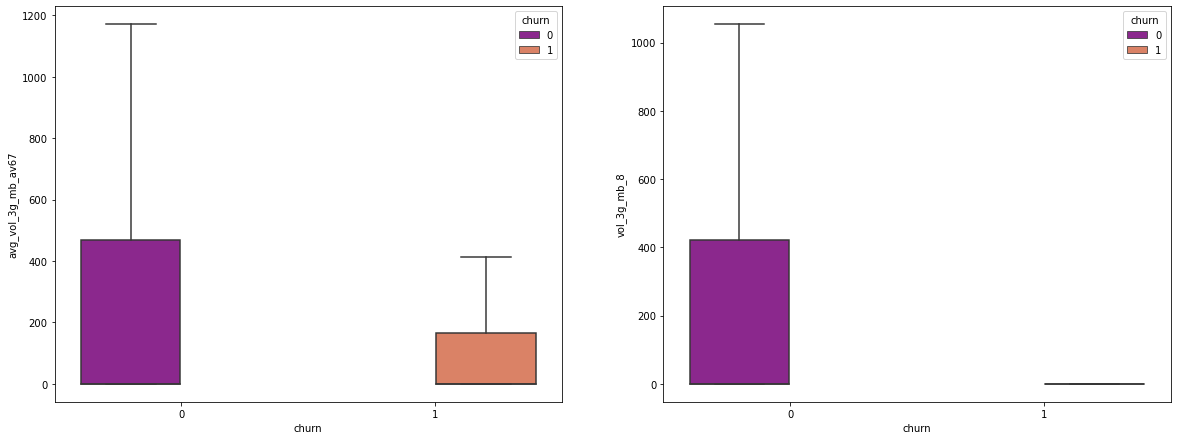

In [100]:
plot_box_chart('vol_3g_mb')

### Monthly data columns

In [101]:
monthly_subcription_2g_3g = filtered_churn.columns[filtered_churn.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

In [102]:
monthly_subcription_2g_3g

Index(['monthly_2g_8', 'monthly_3g_8', 'avg_monthly_2g_av67',
       'avg_monthly_3g_av67'],
      dtype='object')

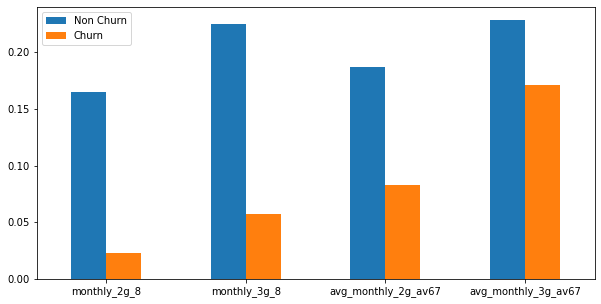

,monthly_2g_8,monthly_3g_8,avg_monthly_2g_av67,avg_monthly_3g_av67
Non Churn,0.165080,0.224891,0.187355,0.228361
Churn,0.023017,0.057131,0.082409,0.171188


In [103]:
plot_mean_bar_chart(filtered_churn, monthly_subcription_2g_3g)

### Sachet Columns

In [104]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = filtered_churn.columns[filtered_churn.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

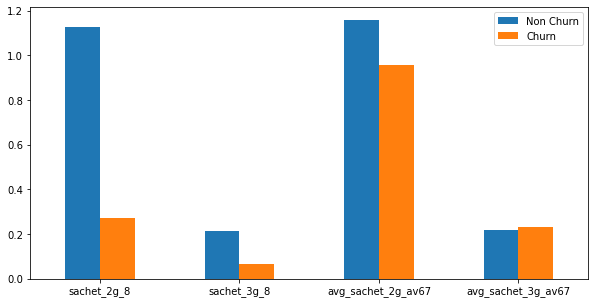

,sachet_2g_8,sachet_3g_8,avg_sachet_2g_av67,avg_sachet_3g_av67
Non Churn,1.125145,0.214571,1.157867,0.217442
Churn,0.270859,0.065351,0.956227,0.233251


In [105]:
plot_mean_bar_chart(filtered_churn, SC_2g_or_3g_col)

### Tenure range

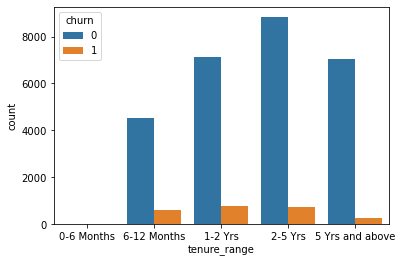

In [106]:
sns.countplot(x="tenure_range", hue="churn",data=filtered_churn)
plt.show();

### Outlier treatment

> As we see here there are a lot of outliers in several numerical variables. We need to delte some outliers to have a good analysis and well performing model

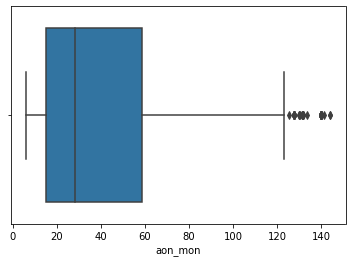

In [107]:
sns.boxplot(filtered_churn.aon_mon)
plt.show();

Continuous values of outliers. We can leave it as it is

> As we can see from the resulting plots, there is a significant reduction in outliers without affecting the dataset shape, using the capping method

In [108]:
filtered_churn.shape

(29953, 93)

## Checking Data Imbalance

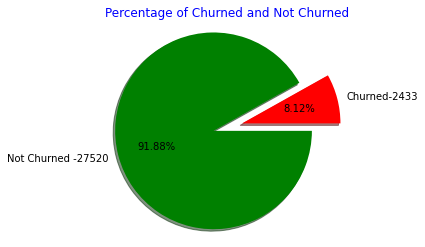

In [109]:
pie_labels=['Churned-'+str(filtered_churn['churn'][filtered_churn.churn==1].count()),'Not Churned -'+str(filtered_churn['churn'][filtered_churn.churn==0].count())]
pie_share=[filtered_churn['churn'][filtered_churn.churn==1].count()/filtered_churn['churn'].count(),
           filtered_churn['churn'][filtered_churn.churn==0].count()/filtered_churn['churn'].count()]
figureObject, axesObject = plt.subplots()
pie_colors=('red','green')
pie_explode=(.3,.0)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=0,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Churned and Not Churned',color='blue')
plt.show();


Data is imbalanced. Need to be handled in model building

In [110]:
filtered_churn_final = filtered_churn.copy()

## Model Building

### Business Metric: Which to maximize?

Since increasing ‘churn’ is the most serious issue in the telecom company, and the company desperately wants to retain  customers. To do that, the marketing head decides to roll out discounts and offers to all customers who are likely to churn  ideally, not a single ‘churn’ customer should be missed. Hence, it is important that the model identifies almost all the  ‘churn’ customers correctly. It is fine if it incorrectly predicts some of the ‘non-churn’ customers as ‘churn’ since in that  case, the worst that will happen is that the company will offer discounts to those customers who would anyway stay.  

| Actual/Predicted | Not Churn   | Churn |
| ---------------- | ----------- | ----- |
| Not Churn        | 3269        | 366   |
| Churn            | 595         | 692   |

From the table above, you can see that there are 595 + 692  = 1287 actual ‘churn’ customers, so ideally the model should  predict all of them as ‘churn’ (i.e. corresponding to the business problem above). But out of these 1287, the current model  only predicts 692 as ‘churn’. Thus, only 692 out of 1287, or only about 53% of ‘churn’ customers, will be predicted by the  model as ‘churn’. This is very risky - the company won’t be able to roll out offers to the rest 47% ‘churn’ customers and they  could switch to a competitor!

So although the accuracy is about 80%, the model only predicts 53% of churn cases correctly.  

Hence accuracy will not be the best metric here. In the further models we will try to increase sensitivity or recall as the metric.

### Model 1: Logistic Regression

#### Data Preparation for Model

In [111]:
filtered_churn_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 93 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   arpu_8                        29953 non-null  float64 
 1   onnet_mou_8                   29953 non-null  float64 
 2   offnet_mou_8                  29953 non-null  float64 
 3   roam_ic_mou_8                 29953 non-null  float64 
 4   roam_og_mou_8                 29953 non-null  float64 
 5   loc_og_t2t_mou_8              29953 non-null  float64 
 6   loc_og_t2m_mou_8              29953 non-null  float64 
 7   loc_og_t2f_mou_8              29953 non-null  float64 
 8   loc_og_t2c_mou_8              29953 non-null  float64 
 9   loc_og_mou_8                  29953 non-null  float64 
 10  std_og_t2t_mou_8              29953 non-null  float64 
 11  std_og_t2m_mou_8              29953 non-null  float64 
 12  std_og_t2f_mou_8              29953 non-null  

In [112]:
cat_cols = list(filtered_churn_final.select_dtypes(include="category").columns)
cat_cols

['tenure_range']

Removing tenure_range as we have aon_mon

In [113]:
filtered_churn_final.drop("tenure_range", axis=1, inplace=True)

#### Train Test split

In [114]:
X = filtered_churn_final.drop("churn",axis=1)
y = filtered_churn_final.churn

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [116]:
# Get non binary columns
features_to_be_scaled = [col for col in filtered_churn_final if not np.isin(filtered_churn_final[col].unique(), [0, 1]).all()]

In [117]:
scaler = StandardScaler()
X_train[features_to_be_scaled] = scaler.fit_transform(X_train[features_to_be_scaled])
X_test[features_to_be_scaled] = scaler.transform(X_test[features_to_be_scaled])

In [118]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,total_amt_data_rech_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_amt_data_rech_av67,aon_mon
16686,0.285056,-0.190303,1.783571,-0.161348,-0.198865,-0.021305,0.150866,0.008432,0.893426,0.086450,-0.186320,1.907658,4.465703,1.266718,0.055469,0.092805,-0.01669,1.158255,-0.407631,-0.313531,0.623622,-0.332277,0.709123,1.732992,0.068081,1.673128,0.594904,0.800539,1.144225,-0.089865,-0.102590,0.471414,-0.093044,0.263260,-0.541994,-0.657966,-0.628234,-0.331949,-0.395370,-0.378158,-0.415216,-0.341319,-0.186735,-0.406953,-0.292510,0.366646,-0.129522,0.636108,5.539233,5.870690,-0.326171,-0.532320,0.791008,-0.179047,-0.503432,-0.191798,-0.153802,-0.093983,-0.232048,-0.043735,-0.326961,0.048366,-0.492486,-0.423848,-0.356632,-0.182219,-0.489771,-0.131541,0.007369,-0.155370,-0.085954,-0.460179,-0.420519,-0.023803,-0.089618,-0.494738,0.373023,-0.276466,0.234472,-0.649876,-0.769529,-0.759111,-0.417798,-0.451127,-0.464895,-0.471912,-0.3974,-0.234903,-0.434737,-0.396584,-0.745158
84709,-0.923819,-0.506983,-0.677955,-0.069335,-0.130035,-0.358504,-0.646728,-0.301658,-0.228322,-0.657020,-0.373061,-0.378736,-0.141347,-0.499874,-0.039759,-0.319465,-0.01669,-0.782041,-0.407631,-0.671136,-0.329743,-0.722697,-0.205485,-0.258252,-0.132790,-0.313698,-0.770418,-0.251626,-0.156932,-0.089865,-0.642013,-0.870995,-0.761021,-0.435970,-0.541994,-0.657966,-0.628234,-0.331949,-0.395370,-0.378158,-0.415216,-0.341319,-0.186735,-0.406953,-0.292510,-0.228623,-0.102873,0.186980,-0.193197,-0.240134,-0.248877,-0.539612,-0.230512,-0.236065,-0.517270,0.049287,0.557523,0.154782,0.416968,-0.043735,1.188167,0.634726,0.126201,0.928691,-0.512260,-0.302912,0.065923,0.085867,1.227525,1.448343,1.111208,0.455986,-0.260722,-0.169672,0.231977,-0.028476,-0.316159,-0.586640,-0.621891,-0.649876,-0.769529,-0.759111,-0.417798,-0.451127,-0.464895,-0.471912,-0.3974,-0.234903,-0.434737,-0.396584,-1.067043
33699,-0.653477,-0.504795,-0.535542,-0.161348,-0.198865,-0.334827,-0.334996,-0.301658,-0.228322,-0.438474,-0.373061,-0.378736,-0.141347,-0.499874,-0.039759,-0.318976,-0.01669,-0.671387,-0.353698,-0.161149,-0.320655,-0.332960,-0.110284,-0.258252,-0.132790,-0.268438,-0.421969,-0.251626,-0.156932,-0.089865,0.652602,-0.611934,-0.761021,-0.575815,1.120331,-0.432944,0.007969,0.955694,-0.395370,-0.378158,1.549451,-0.341319,-0.186735,-0.406953,0.097702,-0.936176,-0.602479,-0.761605,-0.208132,-0.245379,-0.385247,-0.619103,-0.308092,-0.251221,-0.657491,-0.441488,-0.45450

In [119]:
X_test.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,total_amt_data_rech_8,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2t_mou_av67,avg_loc_og_t2m_mou_av67,avg_loc_og_t2f_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2t_mou_av67,avg_std_og_t2m_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_total_og_mou_av67,avg_loc_ic_t2t_mou_av67,avg_loc_ic_t2m_mou_av67,avg_loc_ic_t2f_mou_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2m_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_total_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_total_rech_amt_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_total_rech_data_av67,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_amt_data_rech_av67,aon_mon
48388,10.893526,-0.134222,1.464597,2.560094,2.210581,-0.313429,0.721495,0.130634,1.239398,0.290431,-0.004993,0.828031,-0.141347,0.558968,-0.039759,-0.319465,-0.01669,0.623676,-0.292899,0.269324,-0.277486,0.008524,1.738895,3.252126,-0.132790,3.297734,1.258773,-0.251626,-0.156932,-0.075362,0.221064,8.563552,5.215620,1.102335,-0.541994,-0.657966,-0.628234,-0.331949,-0.395370,-0.378158,-0.415216,-0.341319,-0.186735,-0.406953,-0.292510,15.192467,-0.217224,0.866629,8.821195,6.813346,-0.385018,-0.225523,-0.311145,-0.169664,-0.401655,-0.323642,-0.168492,-0.155356,-0.329176,-0.043735,-0.354354,-0.142972,-0.525987,-0.427979,-0.296280,-0.320820,-0.471195,0.713801,0.746583,-0.141268,0.895030,-0.099222,-0.420519,-0.169672,-0.089618,-0.145041,11.750173,5.681464,5.802986,-0.649876,-0.769529,-0.759111,-0.417798,-0.451127,-0.464895,-0.471912,-0.3974,-0.234903,-0.434737,-0.396584,-1.001416
29754,0.203382,-0.471932,-0.074827,-0.161348,-0.198865,-0.266354,0.586553,-0.251249,-0.228322,0.209401,-0.373061,-0.378736,-0.141347,-0.499874,0.099313,-0.146830,-0.01669,-0.328395,-0.284899,1.961475,0.610671,1.341043,-0.205485,-0.249646,-0.132790,-0.307111,0.983671,-0.251626,-0.156932,-0.089865,-0.318359,0.312837,0.697982,-0.645738,-0.209529,0.953192,0.282808,-0.331949,0.901269,-0.378158,-0.415216,1.243365,-0.186735,-0.406953,-0.180753,-0.428218,-0.566037,-0.147378,-0.208132,-0.245379,-0.317005,0.575873,0.349689,-0.251221,0.198054,-0.439061,-0.460340,-0.155356,-0.604074,-0.043735,-0.354354,-0.142972,-0.448098,-0.270756,1.479077,1.180131,1.072927,-0.127772,-0.314260,0.323544,-0.249070,0.898464,-0.420519,0.404999,-0.089618,-0.611303,-0.394304,0.040171,0.165619,-0.282119,0.719607,0.099384,-0.417798,0.624510,2.096181,-0.471912,-0.3974,-0.234903,-0.434737,-0.273177,2.854945
50131,-0.016805,-0.279781,-0.520922,-0.074123,-0.190981,0.114385,-0.309243,-0.301658,-0.228322,-0.150117,-0.362359,-0.377781,-0.141347,-0.492371,-0.039759,-0.319465,-0.01669,-0.518844,0.732559,0.300396,-0.279530,0.530787,0.028568,-0.071425,-0.006411,-0.041856,0.399720,-0.251626,-0.155545,-0.089865,1.192025,-0.023158,-0.643832,-0.470931,1.452795,-0.432944,0.135209,-0.201880,0.557068,-0.378158,1.942384,-0.341319,-0.186735,0.655999,0.269396,-0.390335,-0.506586,-0.733651,-0.138888,-0.241970,-0.227520,-0.580011,-0.325898,-0.102541,-0.535664,-0.423463,-0.446710,-0.155356,-0.584

#### Model

In [120]:
# First Logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,class_weight='balanced')
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [121]:
y_train_pred = logreg.predict(X_train)

In [122]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

In [123]:
accuracy_score(y_train, y_train_pred)

0.8127533743501694

In [124]:
confusion_matrix(y_train, y_train_pred)

array([[15572,  3643],
       [  283,  1469]], dtype=int64)

In [125]:
recall_score(y_train, y_train_pred)

0.8384703196347032

In [126]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     19215
           1       0.29      0.84      0.43      1752

    accuracy                           0.81     20967
   macro avg       0.63      0.82      0.66     20967
weighted avg       0.92      0.81      0.85     20967



Performance on test set

In [127]:
y_test_pred = logreg.predict(X_test)

In [128]:
accuracy_score(y_test, y_test_pred)

0.8032494992210104

In [129]:
confusion_matrix(y_test, y_test_pred)

array([[6637, 1668],
       [ 100,  581]], dtype=int64)

In [130]:
recall_score(y_test, y_test_pred)

0.8531571218795888

In [131]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88      8305
           1       0.26      0.85      0.40       681

    accuracy                           0.80      8986
   macro avg       0.62      0.83      0.64      8986
weighted avg       0.93      0.80      0.85      8986



#### Feature Selection using RFECV

In [132]:
num_features = X_train.shape
num_features[1]

91

In [133]:
from sklearn.feature_selection import RFECV

In [134]:
logreg = LogisticRegression(random_state=42,class_weight='balanced')

In [135]:
rfecv = RFECV(estimator=logreg, cv=4)

In [136]:
%%time
rfecv.fit(X_train, y_train)

Wall time: 1min 3s


RFECV(cv=4,
      estimator=LogisticRegression(class_weight='balanced', random_state=42))

In [137]:
rfecv.grid_scores_

array([0.63743036, 0.65350251, 0.68722263, 0.72824084, 0.7291471 ,
       0.73463157, 0.74288255, 0.75070398, 0.75332702, 0.75752404,
       0.76734855, 0.77431185, 0.77912925, 0.78284932, 0.7873802 ,
       0.78904945, 0.79028959, 0.79205426, 0.79491577, 0.79725283,
       0.79958981, 0.80135442, 0.80125903, 0.80268983, 0.80359592,
       0.8032621 , 0.80493143, 0.80497909, 0.80636212, 0.80588516,
       0.80621906, 0.80593288, 0.80617135, 0.80536051, 0.80531276,
       0.80660067, 0.80664836, 0.80674375, 0.80722067, 0.80774534,
       0.8079361 , 0.80850847, 0.80855616, 0.80912847, 0.80950999,
       0.81003464, 0.8096531 , 0.8097485 , 0.81008237, 0.81008233,
       0.81027307, 0.81046385, 0.81060688, 0.81103612, 0.81103616,
       0.81117926, 0.8116562 , 0.81160851, 0.81199004, 0.81237157,
       0.81261002, 0.81261003, 0.81280084, 0.81294391, 0.81261006,
       0.81261009, 0.81265778, 0.81280089, 0.81308701, 0.81327779,
       0.8132301 , 0.81337319, 0.81370707, 0.81365936, 0.81380

In [138]:
rfecv.n_features_

75

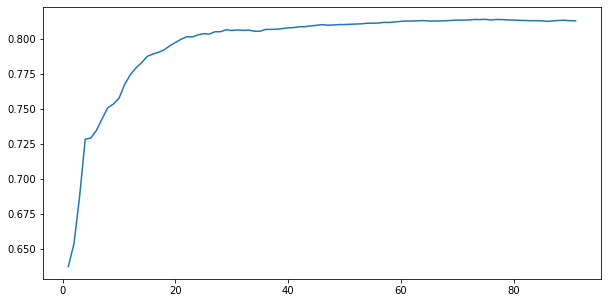

In [139]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show();

The best number of features that RFECV gave is 75. But to have an interpretable model, we won't be having so many features. We will restrict the number of features to 25 even though we lose out on the best accuracy.  

#### Feature Selection using RFE

In [140]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,class_weight='balanced')

In [141]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)
rfe = rfe.fit(X_train, y_train)

In [142]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_8', False, 11),
 ('roam_ic_mou_8', False, 66),
 ('roam_og_mou_8', False, 33),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_8', False, 35),
 ('loc_og_t2f_mou_8', False, 57),
 ('loc_og_t2c_mou_8', False, 36),
 ('loc_og_mou_8', False, 48),
 ('std_og_t2t_mou_8', False, 10),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', False, 27),
 ('std_og_mou_8', False, 34),
 ('isd_og_mou_8', False, 12),
 ('spl_og_mou_8', False, 49),
 ('og_others_8', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', False, 37),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 5),
 ('std_ic_t2m_mou_8', False, 53),
 ('std_ic_t2f_mou_8', False, 29),
 ('std_ic_mou_8', False, 43),
 ('total_ic_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 54),
 ('ic_others_8', False, 22),
 ('total_rech_num_8', False, 8),
 ('total_rech_amt_8', True, 1),
 ('max_r

In [143]:
col = X_train.columns[rfe.support_]
col = list(col)

Analyzing model with Statsmodel

In [144]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def check_vif(X_train, col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [146]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20941
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3956.0
Date:                Tue, 01 Jun 2021   Deviance:                       7912.0
Time:                        00:26:02   Pearson chi2:                 9.68e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.3848      0.089    -49.136      0.000      -4.560      -4.210
arpu_8                       -0.1647      0.150     -1.095      0.273      -0.459       0.130
onnet_mou_8                   0.7234      0.146      4.950      0.000       0.437       1.010
std_og_t2m_mou_8              0.7574      0.148      5.124      0.000       0.468       1.047
og_others_8                  -2.2976      2.364     -0.972      0.331      -6.930       2.335
total_og_mou_8               -1.7717      0.227     -7.813      0.000      -2.216      -1.327
loc_ic_t2t_mou_8             -0.1819      0.437     -0.416      0.677      -1.038       0.674
loc_ic_t2m_mou_8             -0.2243      0.630     -0.356      0.722      -1.459       1.010
loc_ic_mou_8                 -1.7592      0.833     -2.111      0.035      -3.393      -0.126
total_ic_mou_8               -0.5647      0.176     -3.217      0.001      -0.909      -0.221
spl_ic_mou_8                 -0.7848      0.113     -6.947      0.000      -1.006      -0.563
total_rech_amt_8             -0.5072      0.165     -3.067      0.002      -0.831      -0.183
max_rech_amt_8                0.1892      0.053      3.580      0.000       0.086       0.293
last_day_rch_amt_8           -0.3235      0.056     -5.753      0.000      -0.434      -0.213
total_rech_data_8            -1.2118      0.094    -12.881      0.000      -1.396      -1.027
max_rech_data_8              -0.2616      0.062     -4.231      0.000      -0.383      -0.140
monthly_2g_8                 -0.3820      0.068     -5.603      0.000      -0.516      -0.248
vbc_3g_8                     -0.4067      0.081     -5.038      0.000      -0.565      -0.248
total_amt_data_rech_8         0.3759      0.067      5.636      0.000       0.245       0.507
avg_arpu_av67                 0.6667      0.047     14.088      0.000       0.574       0.759
avg_loc_ic_t2m_mou_av67       0.0250      0.122      0.205      0.837      -0.214       0.264
avg_loc_ic_mou_av67           0.5132      0.132      3.889      0.000       0.255       0.772
avg_total_rech_data_av67      0.2931      0.049      5.952      0.000       0.197       0.390
avg_max_rech_data_av67        0.2567      0.073      3.540      0.000       0.115       0.399
avg_av_rech_amt_data_av67    -0.3314      0.085     -3.907      0.000      -0.498      -0.165
aon_mon                      -0.2312      0.038     -6.074      0.000      -0.306      -0.157
=============================================================================================
"""

In [147]:
check_vif(X_train,col)

                     Features    VIF
7                loc_ic_mou_8  64.90
6            loc_ic_t2m_mou_8  35.45
10           total_rech_amt_8  15.51
0                      arpu_8  14.75
5            loc_ic_t2t_mou_8  14.38
4              total_og_mou_8  12.78
20        avg_loc_ic_mou_av67   9.84
19    avg_loc_ic_t2m_mou_av67   8.42
1                 onnet_mou_8   5.85
23  avg_av_rech_amt_data_av67   5.28
2            std_og_t2m_mou_8   5.23
8              total_ic_mou_8   5.12
22     avg_max_rech_data_av67   5.03
13          total_rech_data_8   3.78
14            max_rech_data_8   2.88
21   avg_total_rech_data_av67   2.87
18              avg_arpu_av67   2.81
11             max_rech_amt_8   2.66
17      total_amt_data_rech_8   2.61
12         last_day_rch_amt_8   2.03
16                   vbc_3g_8   1.46
15               monthly_2g_8   1.17
24                    aon_mon   1.11
9                spl_ic_mou_8   1.03
3                 og_others_8   1.00


loc_ic_mou_8 has high VIF. We will drop this column

In [148]:
col.remove("loc_ic_mou_8")

Building model again

In [149]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20942
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3958.8
Date:                Tue, 01 Jun 2021   Deviance:                       7917.5
Time:                        00:26:04   Pearson chi2:                 1.37e+07
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.3788      0.089    -49.148      0.000      -4.553      -4.204
arpu_8                       -0.1770      0.150     -1.183      0.237      -0.470       0.116
onnet_mou_8                   0.7418      0.146      5.093      0.000       0.456       1.027
std_og_t2m_mou_8              0.7791      0.147      5.291      0.000       0.490       1.068
og_others_8                  -2.3025      2.383     -0.966      0.334      -6.973       2.368
total_og_mou_8               -1.7977      0.226     -7.948      0.000      -2.241      -1.354
loc_ic_t2t_mou_8             -0.9683      0.207     -4.678      0.000      -1.374      -0.563
loc_ic_t2m_mou_8             -1.4696      0.207     -7.108      0.000      -1.875      -1.064
total_ic_mou_8               -0.6817      0.179     -3.806      0.000      -1.033      -0.331
spl_ic_mou_8                 -0.7822      0.113     -6.931      0.000      -1.003      -0.561
total_rech_amt_8             -0.4921      0.165     -2.988      0.003      -0.815      -0.169
max_rech_amt_8                0.1844      0.053      3.501      0.000       0.081       0.288
last_day_rch_amt_8           -0.3269      0.056     -5.858      0.000      -0.436      -0.218
total_rech_data_8            -1.2118      0.094    -12.886      0.000      -1.396      -1.027
max_rech_data_8              -0.2609      0.062     -4.218      0.000      -0.382      -0.140
monthly_2g_8                 -0.3830      0.068     -5.613      0.000      -0.517      -0.249
vbc_3g_8                     -0.4115      0.081     -5.088      0.000      -0.570      -0.253
total_amt_data_rech_8         0.3754      0.067      5.628      0.000       0.245       0.506
avg_arpu_av67                 0.6723      0.047     14.255      0.000       0.580       0.765
avg_loc_ic_t2m_mou_av67       0.0841      0.118      0.712      0.476      -0.147       0.315
avg_loc_ic_mou_av67           0.4405      0.126      3.505      0.000       0.194       0.687
avg_total_rech_data_av67      0.2934      0.049      5.961      0.000       0.197       0.390
avg_max_rech_data_av67        0.2566      0.072      3.541      0.000       0.115       0.399
avg_av_rech_amt_data_av67    -0.3329      0.085     -3.930      0.000      -0.499      -0.167
aon_mon                      -0.2375      0.038     -6.260      0.000      -0.312      -0.163
=============================================================================================
"""

In [150]:
check_vif(X_train,col)

                     Features    VIF
9            total_rech_amt_8  15.51
0                      arpu_8  14.75
4              total_og_mou_8  12.73
19        avg_loc_ic_mou_av67   8.74
18    avg_loc_ic_t2m_mou_av67   7.90
1                 onnet_mou_8   5.83
22  avg_av_rech_amt_data_av67   5.28
2            std_og_t2m_mou_8   5.20
6            loc_ic_t2m_mou_8   5.18
21     avg_max_rech_data_av67   5.03
7              total_ic_mou_8   4.83
12          total_rech_data_8   3.78
5            loc_ic_t2t_mou_8   3.20
13            max_rech_data_8   2.88
20   avg_total_rech_data_av67   2.87
17              avg_arpu_av67   2.80
10             max_rech_amt_8   2.66
16      total_amt_data_rech_8   2.61
11         last_day_rch_amt_8   2.03
15                   vbc_3g_8   1.46
14               monthly_2g_8   1.17
23                    aon_mon   1.11
8                spl_ic_mou_8   1.03
3                 og_others_8   1.00


total_rech_amt_8 has high VIF. We will drop this column

In [151]:
col.remove("total_rech_amt_8")

In [152]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20943
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3963.6
Date:                Tue, 01 Jun 2021   Deviance:                       7927.1
Time:                        00:26:05   Pearson chi2:                 1.26e+07
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.3711      0.089    -49.127      0.000      -4.545      -4.197
arpu_8                       -0.6101      0.063     -9.681      0.000      -0.734      -0.487
onnet_mou_8                   0.7335      0.139      5.283      0.000       0.461       1.006
std_og_t2m_mou_8              0.7765      0.141      5.494      0.000       0.499       1.053
og_others_8                  -2.3130      2.385     -0.970      0.332      -6.988       2.362
total_og_mou_8               -1.7912      0.223     -8.029      0.000      -2.228      -1.354
loc_ic_t2t_mou_8             -0.9703      0.207     -4.693      0.000      -1.376      -0.565
loc_ic_t2m_mou_8             -1.4737      0.206     -7.163      0.000      -1.877      -1.070
total_ic_mou_8               -0.6681      0.178     -3.746      0.000      -1.018      -0.319
spl_ic_mou_8                 -0.7855      0.113     -6.947      0.000      -1.007      -0.564
max_rech_amt_8                0.1341      0.048      2.794      0.005       0.040       0.228
last_day_rch_amt_8           -0.3483      0.055     -6.362      0.000      -0.456      -0.241
total_rech_data_8            -1.2193      0.094    -12.960      0.000      -1.404      -1.035
max_rech_data_8              -0.2409      0.062     -3.902      0.000      -0.362      -0.120
monthly_2g_8                 -0.3879      0.068     -5.690      0.000      -0.522      -0.254
vbc_3g_8                     -0.4006      0.081     -4.976      0.000      -0.558      -0.243
total_amt_data_rech_8         0.3725      0.066      5.642      0.000       0.243       0.502
avg_arpu_av67                 0.6563      0.047     14.031      0.000       0.565       0.748
avg_loc_ic_t2m_mou_av67       0.0823      0.118      0.695      0.487      -0.150       0.314
avg_loc_ic_mou_av67           0.4432      0.126      3.519      0.000       0.196       0.690
avg_total_rech_data_av67      0.2805      0.049      5.718      0.000       0.184       0.377
avg_max_rech_data_av67        0.2462      0.072      3.398      0.001       0.104       0.388
avg_av_rech_amt_data_av67    -0.3226      0.085     -3.798      0.000      -0.489      -0.156
aon_mon                      -0.2281      0.038     -6.033      0.000      -0.302      -0.154
=============================================================================================
"""

In [153]:
check_vif(X_train,col)

                     Features    VIF
4              total_og_mou_8  12.73
18        avg_loc_ic_mou_av67   8.74
17    avg_loc_ic_t2m_mou_av67   7.90
1                 onnet_mou_8   5.83
21  avg_av_rech_amt_data_av67   5.27
2            std_og_t2m_mou_8   5.20
6            loc_ic_t2m_mou_8   5.18
20     avg_max_rech_data_av67   5.03
7              total_ic_mou_8   4.82
11          total_rech_data_8   3.77
0                      arpu_8   3.63
5            loc_ic_t2t_mou_8   3.19
12            max_rech_data_8   2.87
19   avg_total_rech_data_av67   2.86
16              avg_arpu_av67   2.70
15      total_amt_data_rech_8   2.61
9              max_rech_amt_8   2.55
10         last_day_rch_amt_8   1.98
14                   vbc_3g_8   1.46
13               monthly_2g_8   1.17
22                    aon_mon   1.10
8                spl_ic_mou_8   1.03
3                 og_others_8   1.00


total_og_mou_8 has high VIF. Let's drop this column

In [154]:
col.remove("total_og_mou_8")

In [155]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3998.2
Date:                Tue, 01 Jun 2021   Deviance:                       7996.5
Time:                        00:26:06   Pearson chi2:                 4.53e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.3916      0.092    -47.725      0.000      -4.572      -4.211
arpu_8                       -0.7429      0.060    -12.326      0.000      -0.861      -0.625
onnet_mou_8                  -0.3103      0.050     -6.188      0.000      -0.409      -0.212
std_og_t2m_mou_8             -0.2641      0.053     -4.981      0.000      -0.368      -0.160
og_others_8                  -2.7752      2.656     -1.045      0.296      -7.982       2.431
loc_ic_t2t_mou_8             -1.0761      0.210     -5.119      0.000      -1.488      -0.664
loc_ic_t2m_mou_8             -2.0075      0.203     -9.913      0.000      -2.404      -1.611
total_ic_mou_8               -0.6986      0.181     -3.864      0.000      -1.053      -0.344
spl_ic_mou_8                 -0.7905      0.113     -6.970      0.000      -1.013      -0.568
max_rech_amt_8                0.1272      0.047      2.685      0.007       0.034       0.220
last_day_rch_amt_8           -0.3539      0.054     -6.527      0.000      -0.460      -0.248
total_rech_data_8            -1.2154      0.094    -12.941      0.000      -1.399      -1.031
max_rech_data_8              -0.2148      0.061     -3.504      0.000      -0.335      -0.095
monthly_2g_8                 -0.3843      0.068     -5.648      0.000      -0.518      -0.251
vbc_3g_8                     -0.3857      0.080     -4.813      0.000      -0.543      -0.229
total_amt_data_rech_8         0.3976      0.066      6.002      0.000       0.268       0.527
avg_arpu_av67                 0.6584      0.047     14.015      0.000       0.566       0.750
avg_loc_ic_t2m_mou_av67       0.0765      0.120      0.636      0.525      -0.159       0.312
avg_loc_ic_mou_av67           0.4915      0.126      3.900      0.000       0.245       0.739
avg_total_rech_data_av67      0.2826      0.049      5.763      0.000       0.187       0.379
avg_max_rech_data_av67        0.2490      0.072      3.445      0.001       0.107       0.391
avg_av_rech_amt_data_av67    -0.3218      0.085     -3.805      0.000      -0.488      -0.156
aon_mon                      -0.2293      0.038     -6.095      0.000      -0.303      -0.156
=============================================================================================
"""

In [156]:
check_vif(X_train,col)

                     Features   VIF
17        avg_loc_ic_mou_av67  8.73
16    avg_loc_ic_t2m_mou_av67  7.88
20  avg_av_rech_amt_data_av67  5.27
19     avg_max_rech_data_av67  5.03
5            loc_ic_t2m_mou_8  4.98
6              total_ic_mou_8  4.82
10          total_rech_data_8  3.77
0                      arpu_8  3.41
4            loc_ic_t2t_mou_8  3.19
11            max_rech_data_8  2.87
18   avg_total_rech_data_av67  2.86
15              avg_arpu_av67  2.70
14      total_amt_data_rech_8  2.60
8              max_rech_amt_8  2.55
9          last_day_rch_amt_8  1.98
13                   vbc_3g_8  1.46
2            std_og_t2m_mou_8  1.24
1                 onnet_mou_8  1.22
12               monthly_2g_8  1.17
21                    aon_mon  1.10
7                spl_ic_mou_8  1.03
3                 og_others_8  1.00


avg_loc_ic_mou_av67 has high VIF. We will drop this column.

In [157]:
col.remove("avg_loc_ic_mou_av67")

In [158]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20945
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4005.4
Date:                Tue, 01 Jun 2021   Deviance:                       8010.8
Time:                        00:26:07   Pearson chi2:                 4.46e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -4.3815      0.092    -47.736      0.000      -4.561      -4.202
arpu_8                       -0.7644      0.060    -12.718      0.000      -0.882      -0.647
onnet_mou_8                  -0.3134      0.050     -6.236      0.000      -0.412      -0.215
std_og_t2m_mou_8             -0.2716      0.053     -5.104      0.000      -0.376      -0.167
og_others_8                  -2.7897      2.659     -1.049      0.294      -8.001       2.422
loc_ic_t2t_mou_8             -0.8177      0.198     -4.128      0.000      -1.206      -0.429
loc_ic_t2m_mou_8             -2.0816      0.201    -10.364      0.000      -2.475      -1.688
total_ic_mou_8               -0.6606      0.179     -3.684      0.000      -1.012      -0.309
spl_ic_mou_8                 -0.7978      0.114     -7.023      0.000      -1.021      -0.575
max_rech_amt_8                0.1264      0.048      2.659      0.008       0.033       0.219
last_day_rch_amt_8           -0.3554      0.054     -6.530      0.000      -0.462      -0.249
total_rech_data_8            -1.2160      0.094    -12.957      0.000      -1.400      -1.032
max_rech_data_8              -0.2154      0.061     -3.512      0.000      -0.336      -0.095
monthly_2g_8                 -0.3802      0.068     -5.590      0.000      -0.514      -0.247
vbc_3g_8                     -0.3794      0.080     -4.745      0.000      -0.536      -0.223
total_amt_data_rech_8         0.4007      0.066      6.047      0.000       0.271       0.531
avg_arpu_av67                 0.6764      0.047     14.450      0.000       0.585       0.768
avg_loc_ic_t2m_mou_av67       0.4814      0.060      7.989      0.000       0.363       0.600
avg_total_rech_data_av67      0.2844      0.049      5.794      0.000       0.188       0.381
avg_max_rech_data_av67        0.2512      0.072      3.470      0.001       0.109       0.393
avg_av_rech_amt_data_av67    -0.3294      0.085     -3.884      0.000      -0.496      -0.163
aon_mon                      -0.2219      0.037     -5.922      0.000      -0.295      -0.148
=============================================================================================
"""

In [159]:
check_vif(X_train,col)

                     Features   VIF
19  avg_av_rech_amt_data_av67  5.27
18     avg_max_rech_data_av67  5.03
5            loc_ic_t2m_mou_8  4.95
6              total_ic_mou_8  4.76
10          total_rech_data_8  3.77
0                      arpu_8  3.40
11            max_rech_data_8  2.87
16    avg_loc_ic_t2m_mou_av67  2.86
17   avg_total_rech_data_av67  2.86
15              avg_arpu_av67  2.70
14      total_amt_data_rech_8  2.60
8              max_rech_amt_8  2.55
9          last_day_rch_amt_8  1.98
4            loc_ic_t2t_mou_8  1.96
13                   vbc_3g_8  1.46
2            std_og_t2m_mou_8  1.24
1                 onnet_mou_8  1.22
12               monthly_2g_8  1.17
20                    aon_mon  1.09
7                spl_ic_mou_8  1.03
3                 og_others_8  1.00


avg_av_rech_amt_data_av67 has high VIF. We will drop this column.

In [160]:
col.remove("avg_av_rech_amt_data_av67")

In [161]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4015.3
Date:                Tue, 01 Jun 2021   Deviance:                       8030.5
Time:                        00:26:08   Pearson chi2:                 4.71e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3887      0.092    -47.627      0.000      -4.569      -4.208
arpu_8                      -0.7273      0.060    -12.139      0.000      -0.845      -0.610
onnet_mou_8                 -0.3197      0.050     -6.353      0.000      -0.418      -0.221
std_og_t2m_mou_8            -0.2788      0.053     -5.234      0.000      -0.383      -0.174
og_others_8                 -2.7891      2.679     -1.041      0.298      -8.040       2.462
loc_ic_t2t_mou_8            -0.8255      0.197     -4.182      0.000      -1.212      -0.439
loc_ic_t2m_mou_8            -2.1049      0.200    -10.500      0.000      -2.498      -1.712
total_ic_mou_8              -0.6526      0.178     -3.661      0.000      -1.002      -0.303
spl_ic_mou_8                -0.7983      0.114     -7.015      0.000      -1.021      -0.575
max_rech_amt_8               0.1331      0.047      2.821      0.005       0.041       0.226
last_day_rch_amt_8          -0.3584      0.055     -6.541      0.000      -0.466      -0.251
total_rech_data_8           -1.1793      0.095    -12.430      0.000      -1.365      -0.993
max_rech_data_8             -0.2453      0.062     -3.956      0.000      -0.367      -0.124
monthly_2g_8                -0.3629      0.068     -5.342      0.000      -0.496      -0.230
vbc_3g_8                    -0.3910      0.080     -4.905      0.000      -0.547      -0.235
total_amt_data_rech_8        0.3132      0.071      4.391      0.000       0.173       0.453
avg_arpu_av67                0.6380      0.046     13.895      0.000       0.548       0.728
avg_loc_ic_t2m_mou_av67      0.4911      0.061      8.103      0.000       0.372       0.610
avg_total_rech_data_av67     0.1716      0.041      4.218      0.000       0.092       0.251
avg_max_rech_data_av67       0.0111      0.040      0.279      0.780      -0.067       0.089
aon_mon                     -0.2244      0.037     -5.995      0.000      -0.298      -0.151
============================================================================================
"""

In [162]:
check_vif(X_train,col)

                    Features   VIF
5           loc_ic_t2m_mou_8  4.95
6             total_ic_mou_8  4.76
10         total_rech_data_8  3.64
0                     arpu_8  3.37
16   avg_loc_ic_t2m_mou_av67  2.86
11           max_rech_data_8  2.85
15             avg_arpu_av67  2.62
8             max_rech_amt_8  2.54
14     total_amt_data_rech_8  2.45
18    avg_max_rech_data_av67  2.37
17  avg_total_rech_data_av67  2.15
9         last_day_rch_amt_8  1.98
4           loc_ic_t2t_mou_8  1.96
13                  vbc_3g_8  1.43
2           std_og_t2m_mou_8  1.24
1                onnet_mou_8  1.22
12              monthly_2g_8  1.16
19                   aon_mon  1.09
7               spl_ic_mou_8  1.03
3                og_others_8  1.00


avg_max_rech_data_av67 has high p-value. We will drop this column.

In [163]:
col.remove("avg_max_rech_data_av67")

In [164]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20947
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4015.3
Date:                Tue, 01 Jun 2021   Deviance:                       8030.6
Time:                        00:26:09   Pearson chi2:                 4.73e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3888      0.092    -47.624      0.000      -4.569      -4.208
arpu_8                      -0.7284      0.060    -12.175      0.000      -0.846      -0.611
onnet_mou_8                 -0.3212      0.050     -6.415      0.000      -0.419      -0.223
std_og_t2m_mou_8            -0.2800      0.053     -5.273      0.000      -0.384      -0.176
og_others_8                 -2.7930      2.680     -1.042      0.297      -8.046       2.460
loc_ic_t2t_mou_8            -0.8254      0.197     -4.180      0.000      -1.212      -0.438
loc_ic_t2m_mou_8            -2.1047      0.200    -10.499      0.000      -2.498      -1.712
total_ic_mou_8              -0.6522      0.178     -3.659      0.000      -1.002      -0.303
spl_ic_mou_8                -0.7984      0.114     -7.017      0.000      -1.021      -0.575
max_rech_amt_8               0.1336      0.047      2.835      0.005       0.041       0.226
last_day_rch_amt_8          -0.3587      0.055     -6.549      0.000      -0.466      -0.251
total_rech_data_8           -1.1826      0.094    -12.559      0.000      -1.367      -0.998
max_rech_data_8             -0.2374      0.055     -4.304      0.000      -0.346      -0.129
monthly_2g_8                -0.3637      0.068     -5.357      0.000      -0.497      -0.231
vbc_3g_8                    -0.3876      0.079     -4.926      0.000      -0.542      -0.233
total_amt_data_rech_8        0.3135      0.071      4.400      0.000       0.174       0.453
avg_arpu_av67                0.6385      0.046     13.918      0.000       0.549       0.728
avg_loc_ic_t2m_mou_av67      0.4900      0.061      8.099      0.000       0.371       0.609
avg_total_rech_data_av67     0.1731      0.040      4.290      0.000       0.094       0.252
aon_mon                     -0.2245      0.037     -5.998      0.000      -0.298      -0.151
============================================================================================
"""

In [165]:
check_vif(X_train,col)

                    Features   VIF
5           loc_ic_t2m_mou_8  4.95
6             total_ic_mou_8  4.76
10         total_rech_data_8  3.59
0                     arpu_8  3.32
16   avg_loc_ic_t2m_mou_av67  2.85
15             avg_arpu_av67  2.59
8             max_rech_amt_8  2.54
14     total_amt_data_rech_8  2.45
17  avg_total_rech_data_av67  2.13
9         last_day_rch_amt_8  1.98
4           loc_ic_t2t_mou_8  1.96
11           max_rech_data_8  1.75
13                  vbc_3g_8  1.40
2           std_og_t2m_mou_8  1.23
1                onnet_mou_8  1.22
12              monthly_2g_8  1.16
18                   aon_mon  1.09
7               spl_ic_mou_8  1.03
3                og_others_8  1.00


og_others_8 has high p-value. We will drop this column.

In [166]:
col.remove("og_others_8")

In [167]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20948
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4018.1
Date:                Tue, 01 Jun 2021   Deviance:                       8036.2
Time:                        00:26:10   Pearson chi2:                 4.74e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -4.3464      0.081    -53.623      0.000      -4.505      -4.188
arpu_8                      -0.7252      0.060    -11.994      0.000      -0.844      -0.607
onnet_mou_8                 -0.3214      0.050     -6.405      0.000      -0.420      -0.223
std_og_t2m_mou_8            -0.2790      0.053     -5.252      0.000      -0.383      -0.175
loc_ic_t2t_mou_8            -0.8074      0.198     -4.086      0.000      -1.195      -0.420
loc_ic_t2m_mou_8            -2.0785      0.201    -10.340      0.000      -2.472      -1.685
total_ic_mou_8              -0.6904      0.180     -3.846      0.000      -1.042      -0.339
spl_ic_mou_8                -0.7981      0.114     -7.017      0.000      -1.021      -0.575
max_rech_amt_8               0.1365      0.047      2.898      0.004       0.044       0.229
last_day_rch_amt_8          -0.3617      0.055     -6.600      0.000      -0.469      -0.254
total_rech_data_8           -1.1854      0.094    -12.586      0.000      -1.370      -1.001
max_rech_data_8             -0.2372      0.055     -4.299      0.000      -0.345      -0.129
monthly_2g_8                -0.3637      0.068     -5.358      0.000      -0.497      -0.231
vbc_3g_8                    -0.3865      0.079     -4.914      0.000      -0.541      -0.232
total_amt_data_rech_8        0.3139      0.071      4.399      0.000       0.174       0.454
avg_arpu_av67                0.6328      0.046     13.874      0.000       0.543       0.722
avg_loc_ic_t2m_mou_av67      0.4914      0.060      8.126      0.000       0.373       0.610
avg_total_rech_data_av67     0.1729      0.040      4.289      0.000       0.094       0.252
aon_mon                     -0.2255      0.037     -6.029      0.000      -0.299      -0.152
============================================================================================
"""

In [168]:
check_vif(X_train,col)

                    Features   VIF
4           loc_ic_t2m_mou_8  4.94
5             total_ic_mou_8  4.76
9          total_rech_data_8  3.59
0                     arpu_8  3.32
15   avg_loc_ic_t2m_mou_av67  2.85
14             avg_arpu_av67  2.59
7             max_rech_amt_8  2.54
13     total_amt_data_rech_8  2.45
16  avg_total_rech_data_av67  2.13
8         last_day_rch_amt_8  1.98
3           loc_ic_t2t_mou_8  1.96
10           max_rech_data_8  1.75
12                  vbc_3g_8  1.40
2           std_og_t2m_mou_8  1.23
1                onnet_mou_8  1.22
11              monthly_2g_8  1.16
17                   aon_mon  1.09
6               spl_ic_mou_8  1.03


Both p-values and VIF look good now.

Building model again with class_weight balanced

In [169]:
#Build model again
logreg = LogisticRegression(random_state=42,class_weight='balanced')
logreg.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [170]:
y_train_pred = logreg.predict(X_train[col])

In [171]:
accuracy_score(y_train, y_train_pred)

0.7913864644441265

In [172]:
confusion_matrix(y_train, y_train_pred)

array([[15131,  4084],
       [  290,  1462]], dtype=int64)

In [173]:
recall_score(y_train, y_train_pred)

0.8344748858447488

In [174]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     19215
           1       0.26      0.83      0.40      1752

    accuracy                           0.79     20967
   macro avg       0.62      0.81      0.64     20967
weighted avg       0.92      0.79      0.83     20967



Performance on test set

In [175]:
y_test_pred = logreg.predict(X_test[col])

In [176]:
accuracy_score(y_test, y_test_pred)

0.7877809926552415

In [177]:
confusion_matrix(y_test, y_test_pred)

array([[6508, 1797],
       [ 110,  571]], dtype=int64)

In [178]:
recall_score(y_test, y_test_pred)

0.8384728340675477

In [179]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      8305
           1       0.24      0.84      0.37       681

    accuracy                           0.79      8986
   macro avg       0.61      0.81      0.62      8986
weighted avg       0.93      0.79      0.83      8986



#### Cross validation score

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
cross_val_score(logreg, X_train[col], y_train, cv=5, n_jobs=-1)

array([0.78683834, 0.80019075, 0.79704269, 0.7901264 , 0.7901264 ])

#### Deciding threshold and maximizing metrics beyond accuracy

Whatever accuracies, precision, recall, f1-scores we saw were according to a default threshold 0.5. However, to maiximize recall or sensitivity, we will use a different threshold

In [182]:
y_train_pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [183]:
y_train_pred_probability = logreg.predict_proba(X_train[col])[:,1]

In [184]:
y_train_pred_probability

array([0.24766493, 0.85829664, 0.22058734, ..., 0.8565144 , 0.07498047,
       0.35795532])

Creating a dataframe with the Churn variable and the predicted probabilities

In [185]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred_probability})

In [186]:
y_train_pred_final.head()

,Churn,Churn_Prob
0,0,0.247665
1,0,0.858297
2,0,0.220587
3,0,0.197597
4,0,0.100846


#### Plotting the ROC Curve

In [187]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [188]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

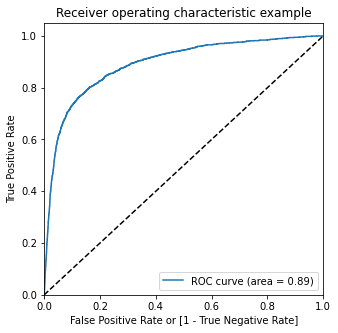

In [189]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [190]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.247665,1,1,1,0,0,0,0,0,0,0
1,0,0.858297,1,1,1,1,1,1,1,1,1,0
2,0,0.220587,1,1,1,0,0,0,0,0,0,0
3,0,0.197597,1,1,0,0,0,0,0,0,0,0
4,0,0.100846,1,1,0,0,0,0,0,0,0,0


In [191]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083560  1.000000  0.000000
0.1   0.1  0.402585  0.972032  0.350664
0.2   0.2  0.538513  0.945205  0.501431
0.3   0.3  0.639576  0.918379  0.614156
0.4   0.4  0.720609  0.883562  0.705751
0.5   0.5  0.791386  0.834475  0.787458
0.6   0.6  0.852387  0.777968  0.859173
0.7   0.7  0.899080  0.706050  0.916680
0.8   0.8  0.926074  0.544521  0.960864
0.9   0.9  0.923213  0.176370  0.991309


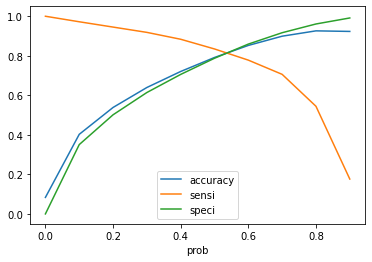

In [192]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show();

Seems like close to 0.5 is the optimal cutoff point as Sensitivity and accuracy both are high at this threshold

So the previous accuracy, sensitivity(recall) scores are the best

In [193]:
#Final features in the model
col

['arpu_8',
 'onnet_mou_8',
 'std_og_t2m_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'monthly_2g_8',
 'vbc_3g_8',
 'total_amt_data_rech_8',
 'avg_arpu_av67',
 'avg_loc_ic_t2m_mou_av67',
 'avg_total_rech_data_av67',
 'aon_mon']

In [194]:
# Find most important feature
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 1)
rfe = rfe.fit(X_train[col], y_train)

In [195]:
list(zip(X_train[col].columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 4),
 ('onnet_mou_8', False, 12),
 ('std_og_t2m_mou_8', False, 13),
 ('loc_ic_t2t_mou_8', False, 2),
 ('loc_ic_t2m_mou_8', True, 1),
 ('total_ic_mou_8', False, 8),
 ('spl_ic_mou_8', False, 7),
 ('max_rech_amt_8', False, 17),
 ('last_day_rch_amt_8', False, 14),
 ('total_rech_data_8', False, 3),
 ('max_rech_data_8', False, 16),
 ('monthly_2g_8', False, 9),
 ('vbc_3g_8', False, 10),
 ('total_amt_data_rech_8', False, 15),
 ('avg_arpu_av67', False, 5),
 ('avg_loc_ic_t2m_mou_av67', False, 6),
 ('avg_total_rech_data_av67', False, 18),
 ('aon_mon', False, 11)]

### Model 2:- Decision Trees

In [196]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

#### Data Preparation for Model

In [197]:
filtered_churn_final.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   arpu_8                        29953 non-null  float64
 1   onnet_mou_8                   29953 non-null  float64
 2   offnet_mou_8                  29953 non-null  float64
 3   roam_ic_mou_8                 29953 non-null  float64
 4   roam_og_mou_8                 29953 non-null  float64
 5   loc_og_t2t_mou_8              29953 non-null  float64
 6   loc_og_t2m_mou_8              29953 non-null  float64
 7   loc_og_t2f_mou_8              29953 non-null  float64
 8   loc_og_t2c_mou_8              29953 non-null  float64
 9   loc_og_mou_8                  29953 non-null  float64
 10  std_og_t2t_mou_8              29953 non-null  float64
 11  std_og_t2m_mou_8              29953 non-null  float64
 12  std_og_t2f_mou_8              29953 non-null  float64
 13  s

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((20967, 91), (8986, 91))

#### Model

In [199]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [200]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Churn', "Not Churned"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dt_default = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=3)

In [203]:
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [204]:
evaluate_model(dt_default)

Train Accuracy : 0.8625935994658273
Train Confusion Matrix:
[[16756  2516]
 [  365  1330]]
--------------------------------------------------
Test Accuracy : 0.8701313153794792
Test Confusion Matrix:
[[7245 1003]
 [ 164  574]]


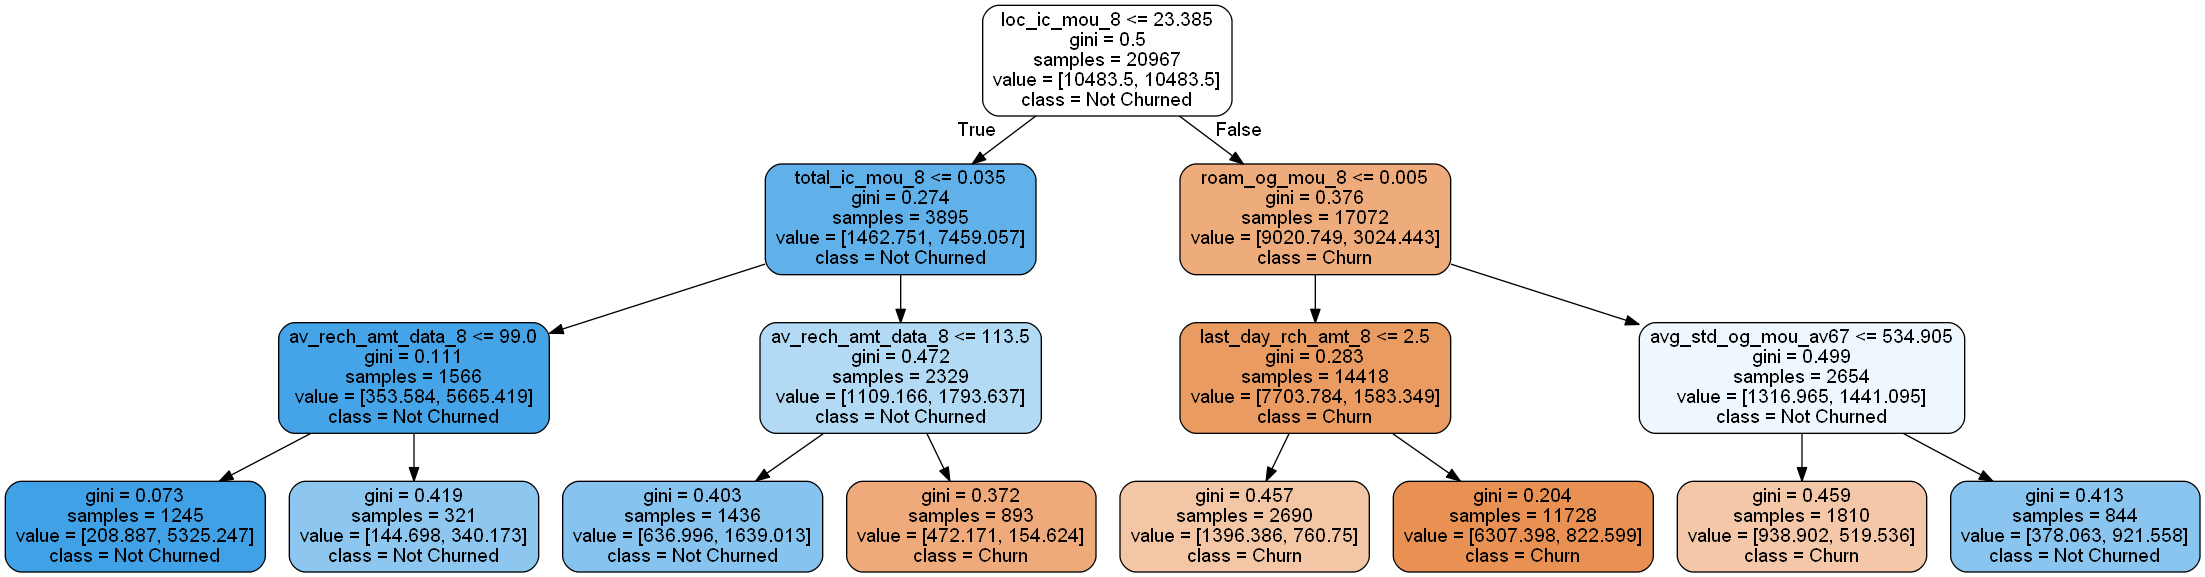

In [205]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

#### Hyperparameter tuning

We will use GridSearchCV for hypertuning as the dataset is small.

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [208]:
params = {
    'max_depth': [2, 3, 5, 10],
    'max_features': [3, 5, 7, 11, 15],
    'min_samples_leaf': [10, 20, 50, 100],
    'min_samples_split': [10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [209]:
# We will use recall as the scoring metric as explained before due to the business needs
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [210]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 640 candidates, totalling 2560 fits
Wall time: 51.1 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [211]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095495,0.004368,0.018450,0.001495,gini,2,3,10,10,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.556604,0.478774,0.808962,0.553191,0.599383,0.124934,569
1,0.100110,0.015020,0.016455,0.001496,gini,2,3,10,20,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.556604,0.478774,0.808962,0.553191,0.599383,0.124934,569
2,0.073066,0.001476,0.015458,0.001496,gini,2,3,10,50,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.556604,0.478774,0.808962,0.553191,0.599383,0.124934,569
3,0.081034,0.003104,0.017453,0.001115,gini,2,3,10,100,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.556604,0.478774,0.808962,0.553191,0.599383,0.124934,569
4,0.083526,0.005343,0.017703,0.001296,gini,2,3,20,10,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.556604,0.478774,0.808962,0.553191,0.599383,0.124934,569


In [212]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
402,0.156016,0.038466,0.035774,0.028550,entropy,3,3,10,50,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.849057,0.858491,0.662736,0.886525,0.814202,0.088528,1
403,0.116497,0.032531,0.019239,0.003908,entropy,3,3,10,100,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.849057,0.858491,0.662736,0.886525,0.814202,0.088528,1
406,0.162633,0.010016,0.029631,0.012133,entropy,3,3,20,50,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.849057,0.858491,0.662736,0.886525,0.814202,0.088528,1
407,0.123394,0.036226,0.018749,0.003105,entropy,3,3,20,100,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.849057,0.858491,0.662736,0.886525,0.814202,0.088528,1
412,0.125372,0.030547,0.029036,0.017033,entropy,3,3,100,10,"{'criterion': 'entropy', 'max_depth': 3, 'max_...",0.851415,0.858491,0.660377,0.886525,0.814202,0.089776,1


In [213]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, max_features=3, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

In [214]:
grid_search.best_score_

0.81420196039074

In [215]:
dt_best = grid_search.best_estimator_

In [216]:
evaluate_model(dt_best)

Train Accuracy : 0.5713263700100157
Train Confusion Matrix:
[[10550  8722]
 [  266  1429]]
--------------------------------------------------
Test Accuracy : 0.5801246383262854
Test Confusion Matrix:
[[4583 3665]
 [ 108  630]]


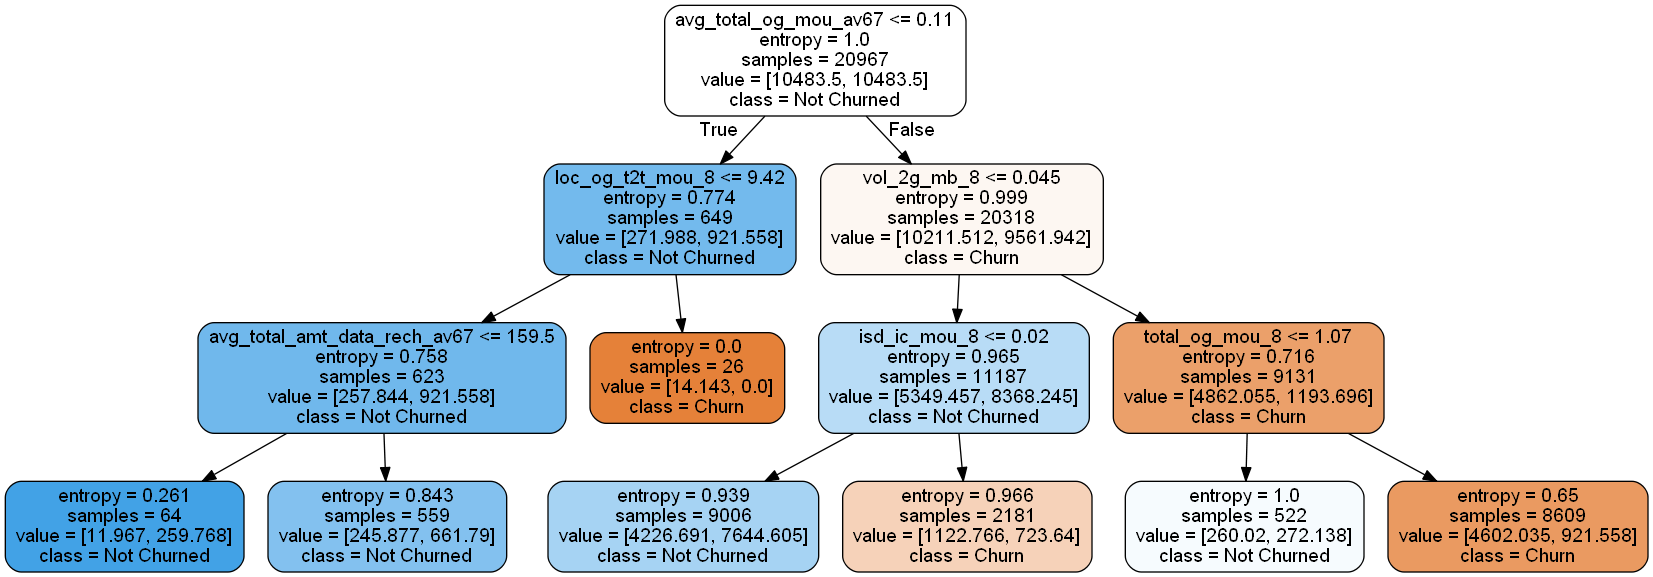

In [217]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

### Model 3:- RandomForest

#### Data Preparation for Model

Same as Decision Tree

#### Model

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, class_weight='balanced')

In [220]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=10,
                       random_state=42)

In [221]:
evaluate_model(rf)

Train Accuracy : 0.87623408212906
Train Confusion Matrix:
[[17106  2166]
 [  429  1266]]
--------------------------------------------------
Test Accuracy : 0.8811484531493434
Test Confusion Matrix:
[[7356  892]
 [ 176  562]]


#### Grid search for hyper-parameter tuning

In [222]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

In [223]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [5, 10, 20, 50, 100],
    'max_features': [7, 11, 15, 20, 25],
    'n_estimators': [10, 30, 50, 100]
}

In [224]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "recall",return_train_score=True)

GridSearchCV will take a lot of time. We will go with RandomizedSearchCV 

#### RandomizedSearchCV

In [225]:
from sklearn.model_selection import RandomizedSearchCV

In [226]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [227]:
model_rcv = RandomizedSearchCV(estimator=classifier_rf, 
                              param_distributions=hyper_params,
                              verbose=1,
                              cv=5,
                              return_train_score=True,
                              n_jobs=-1,
                              n_iter=50,
                              scoring="recall")

In [228]:
model_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, scoring='recall', verbose=1)

In [229]:
model_rcv.best_score_

0.7899705014749262

In [230]:
rf_best = model_rcv.best_estimator_

In [231]:
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=14, max_features=9,
                       min_samples_leaf=370, n_estimators=10, n_jobs=-1,
                       random_state=42)

In [232]:
evaluate_model(rf_best)

Train Accuracy : 0.8729908904468927
Train Confusion Matrix:
[[16937  2335]
 [  328  1367]]
--------------------------------------------------
Test Accuracy : 0.8741375472957934
Test Confusion Matrix:
[[7265  983]
 [ 148  590]]


### Model 4: SVM

We will be using SVC

#### Data Preparation

Same as of Logistic Regression

#### Model

In [233]:
from sklearn import svm
model = svm.SVC(class_weight='balanced') # build model

In [234]:
model.fit(X_train, y_train) # fit model

SVC(class_weight='balanced')

#### Performance on training set

In [235]:
y_train_pred = model.predict(X_train)

In [236]:
accuracy_score(y_true=y_train, y_pred=y_train_pred)

0.8624982114751752

In [237]:
confusion_matrix(y_train, y_train_pred)

array([[16679,  2593],
       [  290,  1405]], dtype=int64)

In [238]:
recall_score(y_train, y_train_pred)

0.8289085545722714

#### Performance on test set

In [239]:
y_test_pred = model.predict(X_test)

In [240]:
accuracy_score(y_true=y_test, y_pred=y_test_pred)

0.8632316937458269

In [241]:
confusion_matrix(y_test, y_test_pred)

array([[7167, 1081],
       [ 148,  590]], dtype=int64)

In [242]:
recall_score(y_test, y_test_pred)

0.7994579945799458

# Inferences and Recommendations

Inferences from EDA
- Most people had lower values of recharge amount, arpu as their graphs were left skewed
- Recharge amount decreased in the action phase(8th month) in comparison with 6th and 7th months for people who churned
- Total recharge data also decreased in the action phase(8th month) in comparison with 6th and 7th months for people who churned
- Volume usage of both 2G and 3g decreased in the action phase(8th month) in comparison with 6th and 7th months for people who churned
- Monthly subscriptions of 2G and 3G decreased in the action phase(8th month) in comparison with 6th and 7th months for people who churned

Inferences from models
- For us, we found logistic regression as the most interpretable model with test accuracy of 78.77% and recall of 83.84%. 
- If we see the final features in the logistic regression model, we can interpret that loc_ic_t2m_mou_8(Local incoming from 1 operator to other operator mobile) is the most important feature
- For us, the most accurate model was Random Forests. It's the most accurate with test accuracy 88.38% But recall is only 78.99%. 
- Hence for the final model we can use Logistic Regression as the recall is the highest amongst other models.

Recommendations
- Customers with less than 5 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schemes to that group.
- Incoming and Outgoing Calls for 8th month are strong indicators of churn behaviour. Company can introduce plans with discounts for outgoing calls.
- Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour. So company should plan in long term to cover as much area as possible.
- Local incoming calls made to same operator and another operator provides a strong indicator of churn behaviour. 